# PyRoot Tutorial (Basics)

### You will see that many of the commands are very similar to what you just learned using the ROOT interactive shell

In [1]:
# We import PyRoot
import ROOT

Welcome to JupyROOT 6.26/04


In [2]:
# We open the Root File ...
file = ROOT.TFile.Open("data_A.3lep.root")

In [3]:
# Check out the pointer to the ROOT File
file

In [4]:
# Check out available Trees/Keys via GetListOfKeys()
keys = file.GetListOfKeys()
for key in keys:
    print(key.GetName())

mini


In [5]:
# Or via the more simple syntax ls()
file.ls()

TFile**		data_A.3lep.root	
 TFile*		data_A.3lep.root	
  KEY: TTree	mini;1	mini


In [6]:
# Get the mini tree
tree = file.Get("mini")

In [7]:
# We again recieve a pointer to the tree (as we did in the interative ROOT shell)
tree

In [8]:
# We check out all available branches, similar to how we grabbed all the keys/trees above
branches = tree.GetListOfBranches()

print("Available branches:")
for branch in branches:
    print(branch.GetName())

Available branches:
runNumber
eventNumber
channelNumber
mcWeight
scaleFactor_PILEUP
scaleFactor_ELE
scaleFactor_MUON
scaleFactor_PHOTON
scaleFactor_TAU
scaleFactor_BTAG
scaleFactor_LepTRIGGER
scaleFactor_PhotonTRIGGER
trigE
trigM
trigP
lep_n
lep_truthMatched
lep_trigMatched
lep_pt
lep_eta
lep_phi
lep_E
lep_z0
lep_charge
lep_type
lep_isTightID
lep_ptcone30
lep_etcone20
lep_trackd0pvunbiased
lep_tracksigd0pvunbiased
met_et
met_phi
jet_n
jet_pt
jet_eta
jet_phi
jet_E
jet_jvt
jet_trueflav
jet_truthMatched
jet_MV2c10
photon_n
photon_truthMatched
photon_trigMatched
photon_pt
photon_eta
photon_phi
photon_E
photon_isTightID
photon_ptcone30
photon_etcone20
photon_convType
tau_n
tau_pt
tau_eta
tau_phi
tau_E
tau_isTightID
tau_truthMatched
tau_trigMatched
tau_nTracks
tau_BDTid
ditau_m
lep_pt_syst
met_et_syst
jet_pt_syst
photon_pt_syst
tau_pt_syst
XSection
SumWeights
largeRjet_n
largeRjet_pt
largeRjet_eta
largeRjet_phi
largeRjet_E
largeRjet_m
largeRjet_truthMatched
largeRjet_D2
largeRjet_tau32
large

In [9]:
# Now we want to access the first 10 events for a given branch
print("Missing transverse momentum for first 10 events in MeV: \n")

for i in range(10):
    tree.GetEntry(i) # Tells which event we are currently looking (iterative -> slow)
    print(round(tree.met_et,1)) # Access value via tree.BRANCHNAME

Missing transverse momentum for first 10 events in MeV: 

42129.1
5189.9
23678.7
21469.2
7181.0
31030.5
65168.3
28536.1
112723.4
43920.7


## Now we want to use RDataFrames instead

In [10]:
# Loading all Root files which match the the given naming scheme in the current folder, accesing the mini Tree
df = ROOT.RDataFrame("mini","data_*.3lep.root")

In [11]:
# Use df.Describe() to get an overview of the loaded dataframe
print(df.Describe())

Dataframe from TChain mini in files
  /mnt/c/Users/aaron/Desktop/3lep/Data/data_A.3lep.root
  /mnt/c/Users/aaron/Desktop/3lep/Data/data_B.3lep.root
  /mnt/c/Users/aaron/Desktop/3lep/Data/data_C.3lep.root
  /mnt/c/Users/aaron/Desktop/3lep/Data/data_D.3lep.root

Property                Value
--------                -----
Columns in total           81
Columns from defines        0
Event loops run             0
Processing slots            1

Column                          Type                                    Origin
------                          ----                                    ------
SumWeights                      Float_t                                 Dataset
XSection                        Float_t                                 Dataset
channelNumber                   Int_t                                   Dataset
ditau_m                         Float_t                                 Dataset
eventNumber                     Int_t                                   Dataset


In [12]:
# Create and draw histogram directly via RDataFrame
h = df.Histo1D(("lepton_pt","Lepton p_{T}", 100, 0., 100000.),"lep_pt")
# Arguements: "Name", "Title", #bins, min, max, branch that you want to plot

h.Draw() #Used to create, fill and draw the histogram

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


### In an interactive python session the root canvas would show up. However, jupyter notebook does not direcly support showing root canvas, hence we will use a workaround to show the histogram

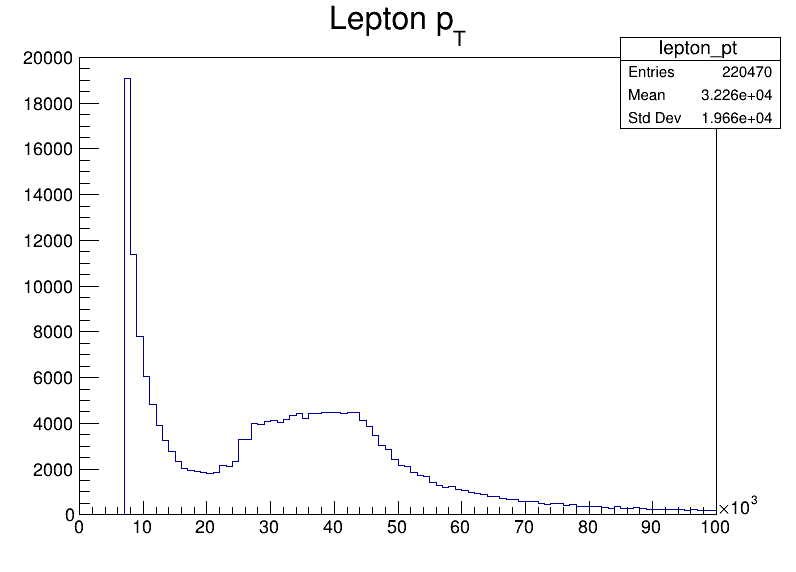

Info in <TCanvas::Print>: png file lepton_pt.png has been created


In [13]:
from IPython.display import Image #Use to show the saved png in the notebook
c = ROOT.TCanvas("c", "Lepton p_T", 800, 600) # Define cavnvas (figure)

h = df.Histo1D(("lepton_pt","Lepton p_{T}", 100, 0., 100000.),"lep_pt")
h.Draw()

c.Update() # Update the canvas to ensure it is drawn
c.SaveAs("lepton_pt.png") # Save the canvas as an image
display(Image("lepton_pt.png")) # Display the image in the notebook

## RDataFrame has many powerful features

### In the following a few examples are given

### Define new variable

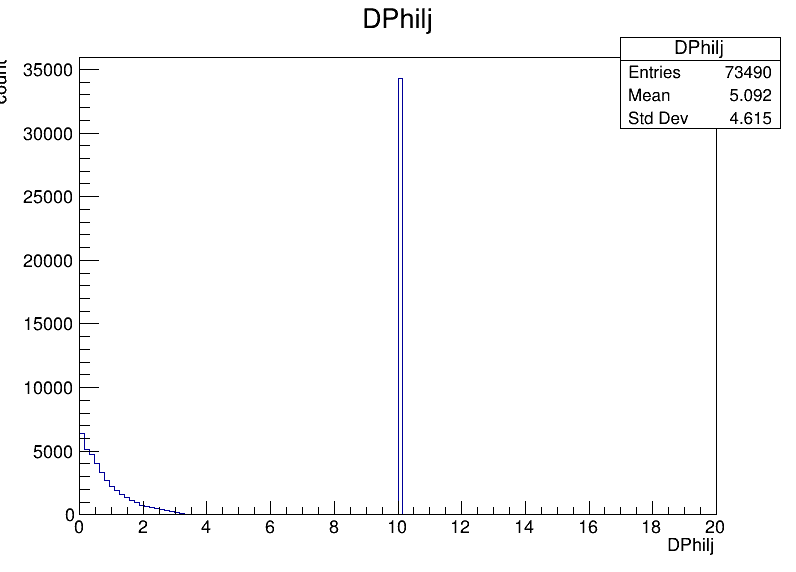

Info in <TCanvas::Print>: png file DPhilj.png has been created


In [14]:
# Define new Variable DPhilj, followed by arbirirary C++ code to calculate the new variable
df_withDPhilj = df.Define("DPhilj","double dphi = 10; for(auto phi_l : lep_phi){ for(auto phi_j : jet_phi){ double delta = std::abs(phi_j - phi_l); if(delta < dphi) dphi = delta;} }; return dphi;")
# The used C++ Code is not relevenat, just want to highly the possiblities

h = df_withDPhilj.Histo1D("DPhilj")
h.Draw()

c.Update() # Update the canvas to ensure it is drawn
c.SaveAs("DPhilj.png") # Save the canvas as an image
display(Image("DPhilj.png")) # Display the image in the notebook

### Apply selection to dataframe

In [15]:
# Apply selection using df.Filter()
df_monoJet = df.Filter("jet_n == 1")

# Count number of events that survive the selection
counter_mod = df_monoJet.Count()
print("Events that fullfil the selection:", counter_mod.GetValue())

# Original dataset
counter = df.Count()
counter.GetValue()

Events that fullfil the selection: 21089


73490

In [16]:
# Original dataset
counter = df.Count()
counter.GetValue()

73490

### Plot multiple distributions in a single canvas

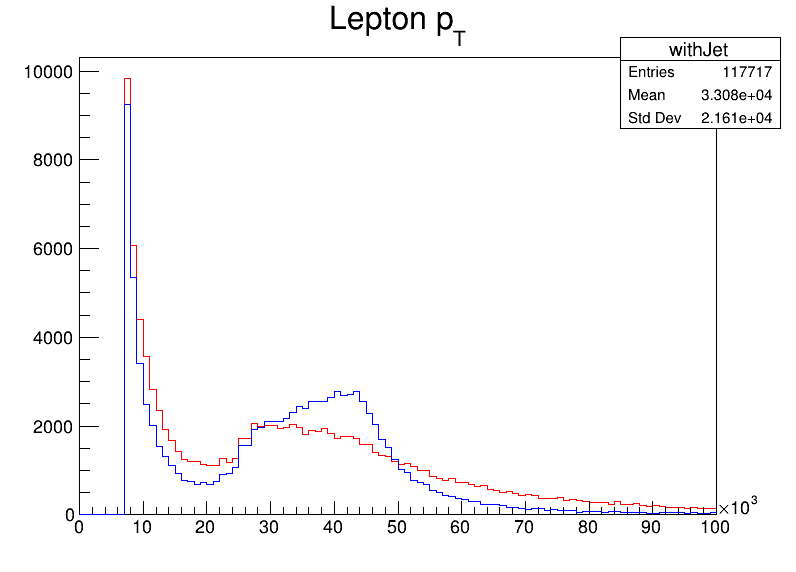

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file lep_pt_2dist.png has been created


In [17]:
c = ROOT.TCanvas("c", "Lepton p_T", 800, 600)

df_withJet = df.Filter("jet_n > 0") # Use filter to apply selection
df_noJet = df.Filter("jet_n == 0")
h_withJet = df_withJet.Histo1D(("withJet","Lepton p_{T}", 100, 0., 100000.),"lep_pt")
h_noJet = df_noJet.Histo1D(("noJet","Lepton p_{T}", 100, 0., 100000.),"lep_pt")

h1 = h_withJet.GetValue() # Convert RDataFrame Histogram in TH1 to set color
h2 = h_noJet.GetValue() # Convert RDataFrame Histogram in TH1 to set color
h1.SetLineColor(ROOT.kRed) # Set color
h2.SetLineColor(ROOT.kBlue) # Set color

h1.Draw()
h2.Draw("SAME") # Plot in the same canvas

c.Update() # Update the canvas to ensure it is drawn
c.SaveAs("lep_pt_2dist.png") # Save the canvas as an image
display(Image("lep_pt_2dist.png")) # Display the image in the notebook

### Save data for further processings / other scripts etc.

In [18]:
# Modified RDataFrames can be easily saved into a new file via:
df_withDPhilj.Snapshot("mini","NewRootFile.root") # e.g we save the combined root files with the new DPhijl feature

<cppyy.gbl.ROOT.RDF.RResultPtr<ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> > object at 0x7ffa899d7fb0>

In [21]:
import numpy as np

# Monkey-patch np.object if it doesn't exist
if not hasattr(np, 'object'):
    np.object = object


# Easy conversion into numpy arrays possible:
array = df.AsNumpy() # One could proceed with standard matplotlib plotting now easily

/tmp/ipykernel_782/4078931957.py:4: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, 'object'):


In [ ]:
# Once we have a numpy basically the whole standard python toolkit is useable, 
# e.g. translate to Pandas DataFrame and save as csv
import pandas as pd
pddf = pd.DataFrame(array)
pddf.to_csv("NewCsvFile.csv")

In [ ]:
# Csv files can be easily loaded as RDataFrame again ...
df = ROOT.RDF.FromCSV("NewCsvFile.csv")